In [1]:
import numpy as np    # for linear algebra
import pandas as pd   # for data processing; Created by McKinney at AQR (hedge fund)
import matplotlib.pyplot as plt

In [2]:
import datetime

#start_date = '2016-01-01'
start_date = datetime.date(2016,1,1)
end_date   = datetime.date.today()
#help(datetime.datetime)

In [3]:
from pandas_datareader import data as web    # pip install pandas-datareader
#import pandas.io.data as web    # to be omitted from library

#http://finance.yahoo.com/quote/GS/history?p=GS
df_AAPL = web.DataReader('AAPL', 'yahoo', start_date, end_date)    # DataFrame datatype
#df_AAPL = web.DataReader('AAPL', 'google', start_date, end_date)
#?web.DataReader
#df_AAPL.head()
df_AAPL.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004
2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995
2017-02-16,135.669998,135.899994,134.839996,135.350006,22118000,135.350006
2017-02-17,135.100006,135.830002,135.100006,135.720001,22084500,135.720001
2017-02-21,136.229996,136.750000,135.979996,136.699997,24265100,136.699997


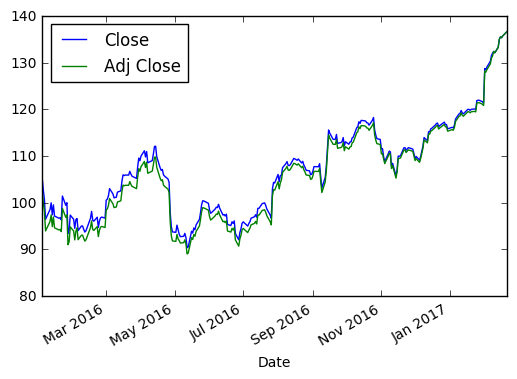

In [4]:
df_AAPL[['Close', 'Adj Close']].plot()
plt.show()

In [5]:
df_AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,286.000000,286.000000,286.000000,286.000000,2.860000e+02,286.000000
mean,106.871853,107.790909,106.115000,107.020839,3.744787e+07,105.692102
std,9.884733,9.867391,10.055364,10.016532,1.710559e+07,10.494651
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,97.967499,98.914999,96.947498,97.745001,2.644655e+07,96.039732
50%,107.025002,107.844998,106.170002,107.119999,3.250220e+07,105.771016
75%,113.602501,114.332497,112.599998,113.547503,4.318472e+07,112.497170
max,136.229996,136.750000,135.979996,136.699997,1.333697e+08,136.699997


In [6]:
df_AAPL.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.997229,0.997078,0.994358,-0.288657,0.993253
High,0.997229,1.000000,0.996684,0.997517,-0.264043,0.995919
Low,0.997078,0.996684,1.000000,0.997466,-0.313127,0.996801
Close,0.994358,0.997517,0.997466,1.000000,-0.289989,0.998778
Volume,-0.288657,-0.264043,-0.313127,-0.289989,1.000000,-0.300178
Adj Close,0.993253,0.995919,0.996801,0.998778,-0.300178,1.000000


In [7]:
#df_AAPL.to_csv('Data/AAPL.csv')    # *.csv: Comma Separated Values

import os

def symbol_to_path(symbol, base_dir='Data'):    # on Win, capitalization doesn't matter
    # return csv file path given (ticker) symbol
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

df_AAPL.to_csv(symbol_to_path('AAPL'))

In [8]:
df_csv = pd.read_csv(symbol_to_path('AAPL'))
df_csv.head()
#df_csv[11:21]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,102.612183
1,2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,100.040792
2,2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,98.083025
3,2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,93.943473
4,2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,94.440222


In [9]:
df_AdjClose = df_csv['Adj Close']

In [10]:
AdjClose = df_csv['Adj Close'].values

In [11]:
n = 20    # how many to look back
p = 5     # how many to look forward
m = len(AdjClose) - n - p + 1    # num of samples
X = np.zeros((m, n))
y = np.zeros(m)

# If i is defined as at the end of the trading day
for i in range(m):
    X[i] = AdjClose[i:i+20]
    y[i] = (AdjClose[i+24] > AdjClose[i+19])

In [12]:
len(AdjClose)

286

In [13]:
m

262

In [14]:
X[260]

array([ 118.526121,  119.481976,  119.472017,  119.262925,  119.481976,
        119.561633,  119.452107,  121.353858,  121.413604,  121.423555,
        121.104937,  120.826147,  128.194203,  127.975152,  128.522781,
        129.727549,  130.962201,  131.469994,  132.419998,  132.119995])

In [15]:
X[260][19]

132.11999499999999

In [16]:
y

array([ 0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1

In [17]:
from sklearn.cross_validation import train_test_split
X_tr, X_tt, y_tr, y_tt = train_test_split(X, y, test_size=0.3, random_state=27)
#help(train_test_split)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf_kn = KNeighborsClassifier(n_neighbors=10)

clf_kn.fit(X_tr, y_tr)

print(clf_kn.score(X_tr, y_tr))
print(clf_kn.score(X_tt, y_tt))
clf_kn.predict(X_tt)

0.732240437158
0.670886075949


array([ 0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.])

In [19]:
clf_kn.score(X_tt, y_tt)

0.67088607594936711

In [20]:
# Split
pct_tr = 0.6    # percentage of training data
pct_cv = 0.2    # percentage of cross validation data
m_tr = int(m * pct_tr)
m_cv = int(m * pct_cv)
m_tt = m - m_tr - m_cv

X_tr = X[:m_tr]
y_tr = y[:m_tr]
X_cv = X[m_tr:m_tr+m_cv]
y_cv = y[m_tr:m_tr+m_cv]
X_tt = X[-m_tt:]
y_tt = y[-m_tt:]

In [21]:
clf_kn = KNeighborsClassifier(n_neighbors=10)

clf_kn.fit(X_tr, y_tr)

print(clf_kn.score(X_tr, y_tr))
print(clf_kn.score(X_cv, y_cv))
print(clf_kn.score(X_tt, y_tt))
print(clf_kn.predict(X_tt))

0.84076433121
0.653846153846
0.716981132075
[ 1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(AdjClose[:m_tr].reshape(-1,1))
AdjClose_sc = sc.transform(AdjClose.reshape(-1,1))

In [23]:
AdjClose_sc

array([[  8.32814430e-01],
       [  3.50766888e-01],
       [ -1.62472188e-02],
       [ -7.92271117e-01],
       [ -6.99147732e-01],
       [ -4.12475601e-01],
       [ -1.51366289e-01],
       [ -6.20632422e-01],
       [ -2.31708077e-01],
       [ -6.68107166e-01],
       [ -7.53925201e-01],
       [ -7.30188485e-01],
       [ -8.19659102e-01],
       [  1.15220582e-01],
       [ -2.46314465e-01],
       [ -1.45888729e-01],
       [ -1.34553012e+00],
       [ -1.22319265e+00],
       [ -6.29762562e-01],
       [ -7.95922386e-01],
       [ -1.15197969e+00],
       [ -8.10530086e-01],
       [ -6.69171034e-01],
       [ -1.14281974e+00],
       [ -9.61069895e-01],
       [ -9.64742347e-01],
       [ -1.09692346e+00],
       [ -1.20156679e+00],
       [ -1.14832711e+00],
       [ -6.61827441e-01],
       [ -3.90121444e-01],
       [ -7.31589041e-01],
       [ -7.71977958e-01],
       [ -6.17767571e-01],
       [ -1.01981695e+00],
       [ -7.60963225e-01],
       [ -6.39796850e-01],
 

In [24]:
# Normalize to unit length: [0, 1]
Temp = AdjClose[:m_tr]

x_max = Temp.max(axis=0)
x_min = Temp.min(axis=0)
(Temp - x_min) / (x_max - x_min)

array([ 0.65494681,  0.53114884,  0.43689341,  0.23759735,  0.26151301,
        0.33513526,  0.40219255,  0.28167707,  0.38155942,  0.26948475,
        0.24744523,  0.25354122,  0.23056365,  0.47065657,  0.37780825,
        0.40359928,  0.09551108,  0.12692942,  0.2793323 ,  0.23665964,
        0.14521811,  0.23290814,  0.26921154,  0.14757054,  0.19424697,
        0.19330382,  0.15935748,  0.1324833 ,  0.14615615,  0.27109749,
        0.34087619,  0.25318154,  0.24280898,  0.28241281,  0.17915973,
        0.24563775,  0.27675532,  0.28382758,  0.27345503,  0.45450178,
        0.46487434,  0.50023506,  0.5714281 ,  0.51767983,  0.47807561,
        0.48231911,  0.48467625,  0.53606737,  0.5483255 ,  0.6454499 ,
        0.7109851 ,  0.70297008,  0.70862757,  0.70815633,  0.74634583,
        0.7185285 ,  0.69684063,  0.67420999,  0.7916075 ,  0.88024496,
        0.85337078,  0.90051845,  0.95379553,  0.89203185,  0.94625174,
        0.83215453,  0.83781236,  0.85478517,  0.92173509,  0.99

In [25]:
AdjClose[m_tr:]

array([ 108.193026,  108.054343,  108.331709,  107.489703,  107.826502,
        107.014213,  106.558539,  105.934466,  105.815591,  105.003302,
        105.10236 ,  105.726441,  106.717038,  106.687314,  107.341112,
        104.527812,  102.160285,  104.44857 ,  106.934963,  110.719044,
        114.483317,  113.839427,  112.51203 ,  112.502122,  112.482314,
        113.542252,  111.650208,  111.818608,  112.026632,  112.878547,
        111.125193,  111.987015,  111.461992,  111.937482,  111.987015,
        112.819113,  112.987513,  114.958807,  115.206456,  116.23667 ,
        115.880062,  116.523945,  116.444703,  116.365453,  116.018745,
        115.959304,  115.503631,  116.543761,  117.138118,  114.503125,
        113.403569,  112.650713,  112.472406,  110.441678,  110.540737,
        109.35588 ,  108.370149,  109.933378,  110.580566,  110.401343,
        107.324686,  107.961922,  105.253663,  106.647621,  109.515186,
        109.475358,  109.584883,  111.24768 ,  111.317377,  110.

In [26]:
AdjClose = (AdjClose - x_min) / (x_max - x_min)

In [27]:
AdjClose

array([ 0.65494681,  0.53114884,  0.43689341,  0.23759735,  0.26151301,
        0.33513526,  0.40219255,  0.28167707,  0.38155942,  0.26948475,
        0.24744523,  0.25354122,  0.23056365,  0.47065657,  0.37780825,
        0.40359928,  0.09551108,  0.12692942,  0.2793323 ,  0.23665964,
        0.14521811,  0.23290814,  0.26921154,  0.14757054,  0.19424697,
        0.19330382,  0.15935748,  0.1324833 ,  0.14615615,  0.27109749,
        0.34087619,  0.25318154,  0.24280898,  0.28241281,  0.17915973,
        0.24563775,  0.27675532,  0.28382758,  0.27345503,  0.45450178,
        0.46487434,  0.50023506,  0.5714281 ,  0.51767983,  0.47807561,
        0.48231911,  0.48467625,  0.53606737,  0.5483255 ,  0.6454499 ,
        0.7109851 ,  0.70297008,  0.70862757,  0.70815633,  0.74634583,
        0.7185285 ,  0.69684063,  0.67420999,  0.7916075 ,  0.88024496,
        0.85337078,  0.90051845,  0.95379553,  0.89203185,  0.94625174,
        0.83215453,  0.83781236,  0.85478517,  0.92173509,  0.99

In [28]:
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                              usecols=['Date', 'Adj Close'], na_values=['nan']) # NaN: Not a Number
        df_temp = df_temp.rename(columns={'Adj Close' : symbol})
        df = df.join(df_temp)
        #df = df.join(df_temp, how='inner')
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df

In [29]:
symbols = ['GOOG','IBM','GLD']

if 'SPY' not in symbols:
    symbols.insert(0, 'SPY')

for symbol in symbols:
    df_temp = web.DataReader(symbol, "yahoo", start_date, end_date)
    df_temp.to_csv(symbol_to_path(symbol))

dates = pd.date_range(start_date, end_date)

In [30]:
df = get_data(symbols, dates)
df.tail()
#df

,SPY,GOOG,IBM,GLD
2017-02-14,233.699997,820.450012,180.130005,116.930000
2017-02-15,234.919998,818.979980,181.679993,117.449997
2017-02-16,234.720001,824.159973,181.429993,118.080002
2017-02-17,235.089996,828.070007,180.669998,117.680000
2017-02-21,236.490005,831.659973,180.259995,117.750000
